In [43]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

import sys
sys.path.append("../BBTRE_physics_analysis/") 
from sloped_MITgcm import *

import warnings
warnings.filterwarnings('ignore', '.*.')

### Physical parameters

In [44]:
Γ = 0.0008613659531090722
θ = 1.26E-3
f = -0.53e-4

dx = 600.

### Test grid pre-processing

In [85]:
data_dir = f"../../MITgcm/experiments/rotated_BBTRE_canyon-tracer/run/"
ds = open_mdsdataset(data_dir,ignore_unknown_vars=True,prefix=["tracerDiag"], delta_t=delta_t)

In [86]:
extend_multiples = [-1, 0]
xslice = [-1e5,2.75e5]
zoomslice = [-0.75e5,3e5]

Lx = ds['XC'].size*dx
ds = periodic_extend(ds, ['XC', 'XG'], Lx, extend_multiples)

In [87]:
ds = ds.sel(XC=slice(*xslice), XG=slice(*xslice))

In [88]:
ds = shift_vertical_coordinate(ds)
ds, grid = add_rotated_coords(ds, θ)

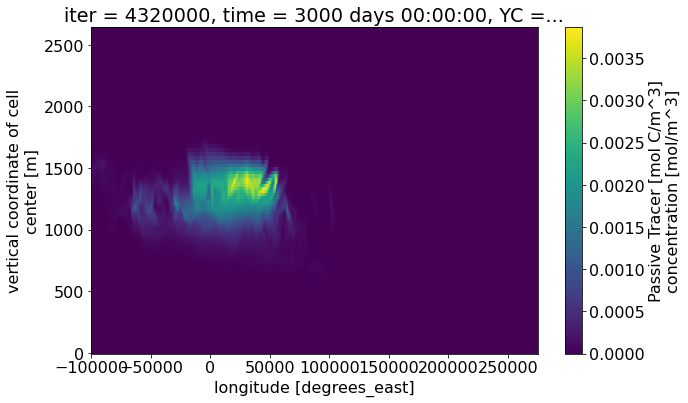

In [89]:
ds['TRAC01'].isel(YC=43).isel(time=-1).plot()

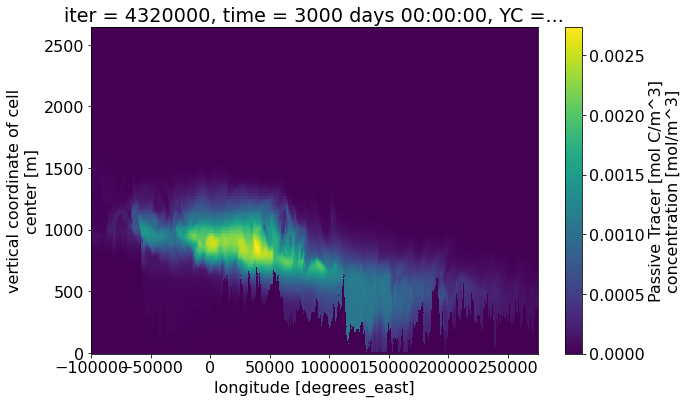

In [90]:
ds['TRAC02'].isel(YC=43).isel(time=-1).plot()

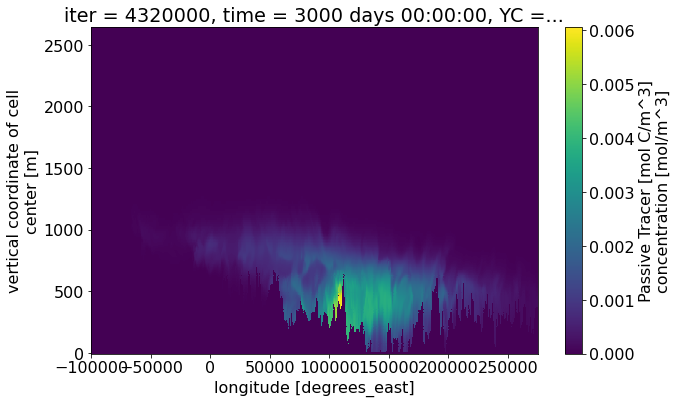

In [91]:
ds['TRAC03'].isel(YC=43).isel(time=-1).plot()

In [92]:
zranges = [
    [500, 1500],
    [0, 1500],
    [0, 1250]
]

In [ ]:
ds.drop_vars(['TRAC01', 'TRAC02', 'TRAC03']).to_netcdf(f"../../MITgcm/experiments/rotated_BBTRE_canyon-tracer/run/tracer_coords.nc")
for tr in range(0,3):
    print(tr)
    for i in range(ds.time.size):
        ds[f'TRAC0{tr+1}'].isel(time=i).sel(Z=slice(*zranges[tr][::-1])).to_netcdf(f"../../MITgcm/experiments/rotated_BBTRE_canyon-tracer/run/tracer0{tr}_{str(i).zfill(4)}.nc")

0
1
2
